In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import lime
import lime.lime_tabular
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter('ignore')
from docx import Document
from docx.shared import Inches


In [10]:
fao_data = pd.read_csv("datasets/latest0705.csv", index_col='Unnamed: 0')
fao_data



,Nutrient nitrogen N (total) - tonnes,Nutrient phosphate P2O5 (total) - tonnes,Nutrient potash K2O (total) - tonnes,Item,Yield(tonnes/ha),Fung & Bact – Benzimidazoles,"Fung & Bact – Diazines, morpholines",Fung & Bact – Dithiocarbamates,Fung & Bact – Inorganics,Fung & Bact – Other,...,Rodenticides – Other-3,Herbicides – Bipiridils-1,Herbicides – Bipiridils-2,Herbicides – Bipiridils-3,Herbicides – Sulfonyl ureas-1,Herbicides – Sulfonyl ureas-2,Herbicides – Sulfonyl ureas-3,Rodenticides – Anti-coagulants-1,Rodenticides – Anti-coagulants-2,Rodenticides – Anti-coagulants-3
1990-01-01,0.0,0.0,0.0,Apples,26.3272,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00,5.00,5.00
1990-01-01,0.0,0.0,0.0,Apricots,2.5781,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00,5.00,5.00
1990-01-01,0.0,0.0,0.0,Cherries,5.0828,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00,5.00,5.00
1990-01-01,0.0,0.0,0.0,Currants,7.0383,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00,5.00,5.00
1990-01-01,0.0,0.0,0.0,Gooseberries,6.8081,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00,5.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01,0.0,0.0,0.0,Sunflower seed,-0.8656,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,-81.0,0.0,0.0,31.0,0.41,0.41,0.41
2020-01-01,-106607.0,-55584.0,26854.0,Hop cones,0.2323,-15.0,-241.0,142.0,140.0,-773.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.41,0.41,0.41
2020-01-01,0.0,0.0,0.0,Rape or colza seed,1.4064,0.0,0.0,0.0,0.0,0.0,...,0.0,-84.0,0.0,0.0,4.0,0.0,0.0,0.10,0.41,0.41
2020-01-01,0.0,0.0,0.0,Soya beans,-1.0056,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-84.0,0.0,0.0,4.0,0.0,0.10,0.10,0.41


In [11]:
cat_names = fao_data['Category'].unique()
cat_names

array(['Fruits and Nuts', 'Vegetables and Legumes', 'Cereals',
       'Industrial_crops'], dtype=object)

Intercept 6.418171551002988
Prediction_local [19.94087567]
Right: 19.929202199999953


,Features_Fruits and Nuts,Coeffcients (RandomForest)_Fruits and Nuts
0,Yield(tonnes/ha)-1 <= 0.17,6.831517
1,0.00 < Summer <= 1.00,2.882316
2,Herbicides – Urea derivates <= 0.51,1.430159
3,Yield(tonnes/ha)-3 <= 0.17,1.150995
4,Yield(tonnes/ha)-2 <= 0.17,-1.118159
5,Fall <= 0.00,0.931132
6,Herbicides – Phenoxy hormone products <= 0.52,0.751545
7,Nutrient potash K2O (total) - tonnes-3 <= 0.51,0.660492
8,Herbicides – Sulfonyl ureas-3 <= 0.50,0.645104
9,Fung & Bact – Inorganics <= 0.50,-0.642397


Intercept 116.32790404731293
Prediction_local [44.76418768]
Right: 30.19823859999998


,Features_Vegetables and Legumes,Coeffcients (RandomForest)_Vegetables and Legumes
0,Summer <= 0.00,-99.308481
1,Yield(tonnes/ha)-1 > 0.38,7.675993
2,Yield(tonnes/ha)-3 <= 0.04,5.572529
3,0.04 < Yield(tonnes/ha)-2 <= 0.21,5.384636
4,Autumn > 0.00,5.367493
5,Herbicides – Phenoxy hormone products-1 <= 0.52,3.662624
6,Insecticides – Other-1 <= 0.43,3.435290
7,Fung & Bact – Benzimidazoles-1 <= 0.51,-3.356030
8,Fung & Bact – Benzimidazoles-2 <= 0.51,3.332765
9,Herbicides – Urea derivates-2 <= 0.51,-3.330533


Intercept -0.10248523393148823
Prediction_local [0.61641871]
Right: 1.5562766000000032


,Features_Cereals,Coeffcients (RandomForest)_Cereals
0,Summer <= 0.00,-1.767738
1,0.55 < Yield(tonnes/ha)-1 <= 0.65,1.044387
2,Herbicides – Phenoxy hormone products <= 0.53,0.309927
3,0.00 < Autumn <= 1.00,0.281295
4,0.55 < Yield(tonnes/ha)-2 <= 0.65,0.255757
5,Spring <= 0.00,0.234226
6,Insecticides – Botanical products and biologic...,0.207794
7,"Fung & Bact – Triazoles, diazoles <= 0.50",0.192757
8,Herbicides – Carbamates-3 <= 0.51,-0.190996
9,Nutrient potash K2O (total) - tonnes-1 <= 0.52,0.151495


Intercept 0.1372587227899772
Prediction_local [0.4269689]
Right: 2.8512372000000137


,Features_Industrial_crops,Coeffcients (RandomForest)_Industrial_crops
0,Yield(tonnes/ha)-1 <= 0.35,0.621653
1,0.00 < Spring <= 1.00,0.229663
2,Year-round <= 0.00,-0.180053
3,Herbicides – Phenoxy hormone products-3 <= 0.53,-0.106255
4,Nutrient potash K2O (total) - tonnes <= 0.52,-0.094028
5,Insecticides – Pyrethroids-3 <= 0.50,0.070252
6,"Fung & Bact – Triazoles, diazoles-3 <= 0.50",-0.068611
7,Herbicides – Urea derivates <= 0.52,-0.062044
8,Fung & Bact – Dithiocarbamates-3 <= 0.51,-0.061095
9,Nutrient nitrogen N (total) - tonnes-3 <= 0.51,-0.059771


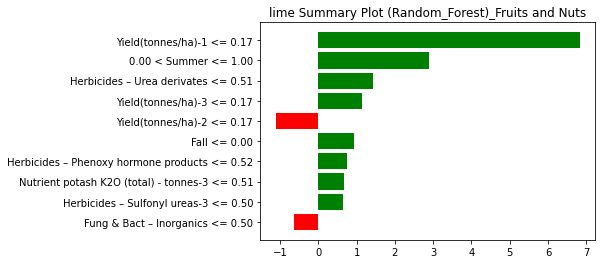

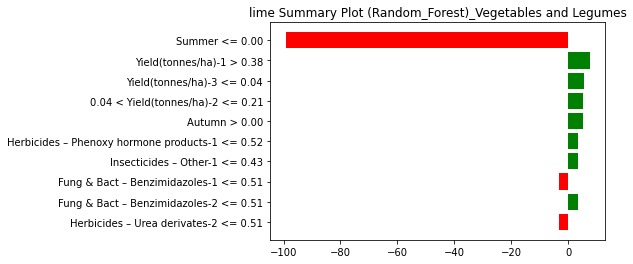

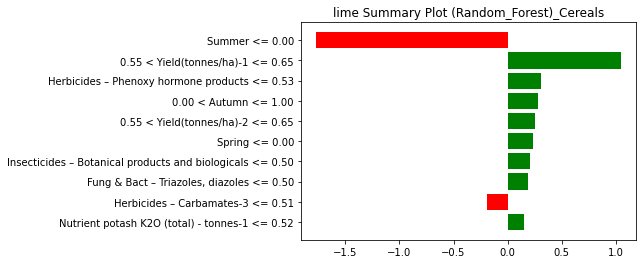

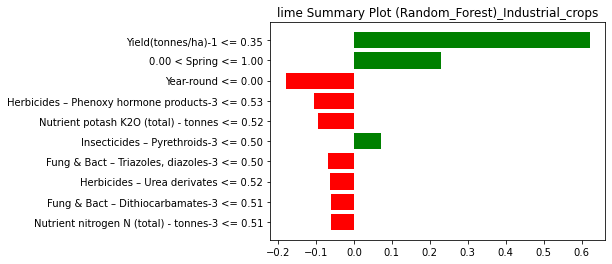

In [12]:
doc = Document()
scaler = MinMaxScaler()
for cat in cat_names:
    crop_df = fao_data[fao_data['Category'] == cat]
    encoded_df = pd.get_dummies(crop_df[["Crop_season"]], prefix='', prefix_sep='')

    y = crop_df[['Yield(tonnes/ha)']]
    x = crop_df.drop(['Yield(tonnes/ha)', "Item", "Category", "Crop_season"], axis=1)
    x = pd.concat([x, encoded_df], axis=1)
    

    mean = x.mean()
    std = x.std()
    lower_bound = mean - 2 * std
    upper_bound = mean + 2 * std
    x = x.clip(lower_bound, upper_bound, axis=1)

    x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=False)
    regressor = RandomForestRegressor(n_estimators = 500, random_state = 42)#, max_depth= 10)
    regressor.fit(x_train, y_train)
    
    #prediction of new value
    y_pred = regressor.predict(x_test)
    explainer = lime.lime_tabular.LimeTabularExplainer(np.array(x_train),
                    feature_names=pd.DataFrame(x_test).columns, 
                    class_names=['Yield(tonnes/ha)'], verbose=True, mode='regression')
    exp = explainer.explain_instance(pd.DataFrame(x_test).iloc[0], 
     regressor.predict, num_features=10)
    exp_list = exp.as_list()
    exp_list = [(feat, abs(coeff)) for feat, coeff in exp_list] # add absolute value of coefficients
    exp_list.sort(key=lambda x: x[1], reverse=True)
    exp.as_pyplot_figure()
    plt.title("lime Summary Plot (Random_Forest)_" + cat)
    display(pd.DataFrame(exp.as_list(),  columns=['Features_' + cat, 'Coeffcients (RandomForest)_' + cat]))

    
    # create a table for Lime results
    table = doc.add_table(rows=1, cols=2)
    hdr_cells = table.rows[0].cells
    hdr_cells[0].text = 'Features_' + cat
    hdr_cells[1].text = 'Coefficients (RandomForest)_' + cat
    
    for feature, coefficient in exp.as_list():
        row_cells = table.add_row().cells
        row_cells[0].text = str(feature)
        row_cells[1].text = str(coefficient)

    # add a page break
    doc.add_page_break()

# save the Word document
doc.save('lime_results_random_forest.docx')
   

    
   
